This notebook is a first exploration into whether the non-specific responders are more variable across people than most other bugs.

Goal:
- if the "shared" bugs *are* more variable, then this supports our "caution to researchers that most reported associations may be spurious and not biologically related to the disease of interest"
- if the "shared" bugs are *not* more variable, then this supports our hypothesis that there's some biology driving their responses across multiple diseases.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os, sys
src_dir = os.path.normpath(os.path.join(os.getcwd(), '../util'))
sys.path.insert(0, src_dir)
import FileIO as fio
import util

In [3]:
datadir = '/Users/claire/github/microbiomeHD/data/clean_tables/'

fncore = '../../data/analysis_results/meta.counting.q-0.05.2_diseases.across_all_diseases.txt'
coredf = pd.read_csv(fncore, sep='\t', index_col=0)
coredf.head()

,overall
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,NaN
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,NaN
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Mobiluncus,NaN
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Varibaculum,1.0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae;g__Corynebacterium,NaN


In [11]:
df, meta = fio.read_dataset_files('cdi_youngster', datadir)
df = util.raw2abun(df)

## Collapse to genus level
df = util.collapse_taxonomic_contents_df(df, 'genus')
df.mean()

k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfomicrobiaceae;g__Desulfomicrobium               0.000050
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Dolosigranulum                                      0.000064
k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Veillonellaceae;g__Centipeda                                       0.000090
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Cellulosilyticum                                     0.000064
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Enterobacter                     0.035673
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Pantoea                          0.000067
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes                                          0.003252
k__Bacteria;p

In [30]:
datasetids = fio.get_dataset_ids(datadir)

cvlst = []
ublst = []
ablst = []
for dataset in datasetids:
    print(dataset),
    ## Read dataset
    df, meta = fio.read_dataset_files(dataset, datadir)
    df = util.raw2abun(df)

    ## Collapse to genus level
    df = util.collapse_taxonomic_contents_df(df, 'genus')

    cv = df.std() / df.mean()
    cv.name = dataset
    
    # Ubiquity
    ubi = (df > 0).sum() / df.shape[0]
    ubi.name = dataset
    
    # Mean abundance (within people who have it)
    abun = df.sum() / (df > 0).sum()
    abun.name = dataset
    
    cvlst.append(cv)
    ublst.append(ubi)
    ablst.append(abun)

cdi_youngster hiv_noguerajulian hiv_lozupone t1d_alkanani edd_singh asd_son crc_zeller liv_zhang ibd_papa ob_zhu crc_baxter cdi_schubert par_scheperjans crc_wang ibd_gevers nash_zhu cdi_vincent ob_ross asd_kang art_scher crc_chen ob_turnbaugh hiv_dinh noncdi_schubert ibd_morgan ob_zupancic ob_goodrich t1d_mejialeon ibd_willing nash_wong


In [32]:
#df.sum() / (df > 0).sum()
#df.mean()

In [33]:
cvdf = pd.concat(cvlst, axis=1)
ubidf = pd.concat(ublst, axis=1)
abundf = pd.concat(ablst, axis=1)
cvdf.head()

,cdi_youngster,hiv_noguerajulian,hiv_lozupone,t1d_alkanani,edd_singh,asd_son,crc_zeller,liv_zhang,ibd_papa,ob_zhu,...,crc_chen,ob_turnbaugh,hiv_dinh,noncdi_schubert,ibd_morgan,ob_zupancic,ob_goodrich,t1d_mejialeon,ibd_willing,nash_wong
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium,NaN,NaN,NaN,NaN,NaN,NaN,11.338780,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,NaN,4.963824,2.711132,7.008263,NaN,NaN,2.386900,NaN,NaN,NaN,...,NaN,NaN,NaN,6.036091,7.679959,NaN,3.964877,NaN,NaN,NaN
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,NaN,4.587775,NaN,NaN,NaN,NaN,4.385177,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.202071,NaN,NaN,NaN
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Methanomassiliicoccales;f__Methanomassiliicoccaceae;g__Methanomassiliicoccus,NaN,NaN,NaN,NaN,NaN,NaN,4.345876,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.789333,NaN,NaN,NaN
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
meancv = cvdf.mean(axis=1)
meancv.name = 'mean_cv'
meancv = pd.concat((coredf, meancv), axis=1)

In [35]:
meancv['mean_abun'] = abundf.mean(axis=1)
meancv['mean_ubiq'] = ubidf.mean(axis=1)
meancv.head()

,overall,mean_cv,mean_abun,mean_ubiq
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium,NaN,11.338780,0.003263,0.038760
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,NaN,5.044171,0.006755,0.251169
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,NaN,8.121700,0.003101,0.099314
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Methanomassiliicoccales;f__Methanomassiliicoccaceae;g__Methanomassiliicoccus,NaN,8.611755,0.000615,0.075602
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,NaN,7.071068,0.028852,0.020000


In [36]:
meancv.head()

,overall,mean_cv,mean_abun,mean_ubiq
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium,NaN,11.338780,0.003263,0.038760
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,NaN,5.044171,0.006755,0.251169
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,NaN,8.121700,0.003101,0.099314
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Methanomassiliicoccales;f__Methanomassiliicoccaceae;g__Methanomassiliicoccus,NaN,8.611755,0.000615,0.075602
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,NaN,7.071068,0.028852,0.020000


In [41]:
meancv['overall'] = meancv['overall'].fillna('nan')

In [43]:
meancv.groupby('overall').mean()

,mean_cv,mean_abun,mean_ubiq
overall,,,
-1.0,2.849531,0.026930,0.533770
0.0,3.030126,0.030848,0.501938
1.0,5.666259,0.013959,0.277019
nan,6.728600,0.007346,0.151647


In [81]:
meancv['mean_ubiq_bin'] = pd.cut(meancv['mean_ubiq'], np.linspace(0, 1, 5))
# max mean abundance is 0.27
meancv['mean_abun_bin'] = pd.cut(meancv['mean_abun'], np.logspace(-5, 0, 6))

(0, 20.0)

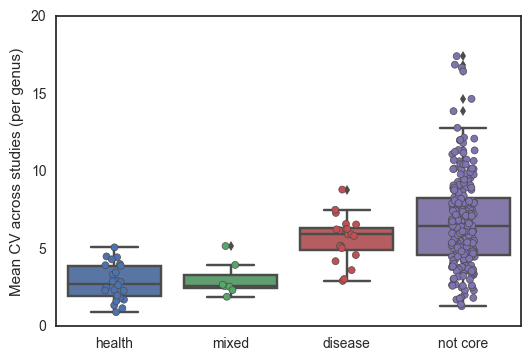

In [84]:
sns.set_style('white')
fig, ax = plt.subplots()
sns.boxplot(data=meancv, x='overall', y='mean_cv')
sns.stripplot(data=meancv, x='overall', y='mean_cv', 
              jitter=True, linewidth=0.5, split=True)
ax.set_ylabel('Mean CV across studies (per genus)')
ax.set_xticklabels(['health', 'mixed', 'disease', 'not core'])
ax.set_xlabel('')
ax.set_ylim([0, None])

(0, 20.0)

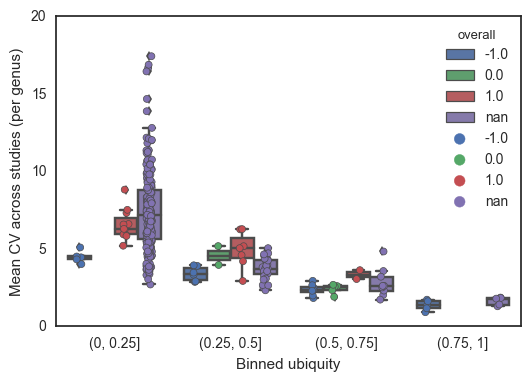

In [82]:
sns.set_style('white')
fig, ax = plt.subplots()
sns.boxplot(data=meancv, x='mean_ubiq_bin', y='mean_cv', hue='overall')
sns.stripplot(data=meancv, x='mean_ubiq_bin', y='mean_cv', hue='overall', 
              jitter=True, linewidth=0.5, split=True)
ax.set_ylabel('Mean CV across studies (per genus)')
#ax.set_xticklabels(['health', 'mixed', 'disease', 'not core'])
ax.set_xlabel('Binned ubiquity')
ax.set_ylim([0, None])

(0, 20.0)

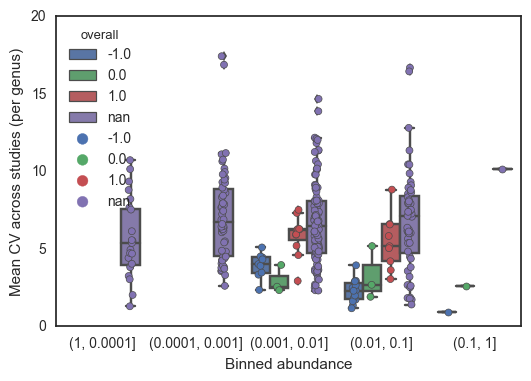

In [83]:
sns.set_style('white')
fig, ax = plt.subplots()
sns.boxplot(data=meancv, x='mean_abun_bin', y='mean_cv', hue='overall')
sns.stripplot(data=meancv, x='mean_abun_bin', y='mean_cv', hue='overall', 
              jitter=True, linewidth=0.5, split=True)
ax.set_ylabel('Mean CV across studies (per genus)')
#ax.set_xticklabels(['health', 'mixed', 'disease', 'not core'])
ax.set_xlabel('Binned abundance')
ax.set_ylim([0, None])

In [41]:
from scipy.stats import ranksums

ranksums(meancv.query('overall == -1')['mean_cv'].dropna(), meancv.query('overall == 1')['mean_cv'].dropna())

RanksumsResult(statistic=-4.902607016226729, pvalue=9.4573062694856756e-07)

In [43]:
ranksums(meancv.query('overall == -1')['mean_cv'].dropna(), meancv.query('overall == "nan"')['mean_cv'].dropna())

RanksumsResult(statistic=-6.6264295999185592, pvalue=3.4390337019948479e-11)

In [44]:
ranksums(meancv.query('overall == -1')['mean_cv'].dropna(), meancv.query('overall == 0')['mean_cv'].dropna())

RanksumsResult(statistic=-0.3779644730092272, pvalue=0.70545698611127339)